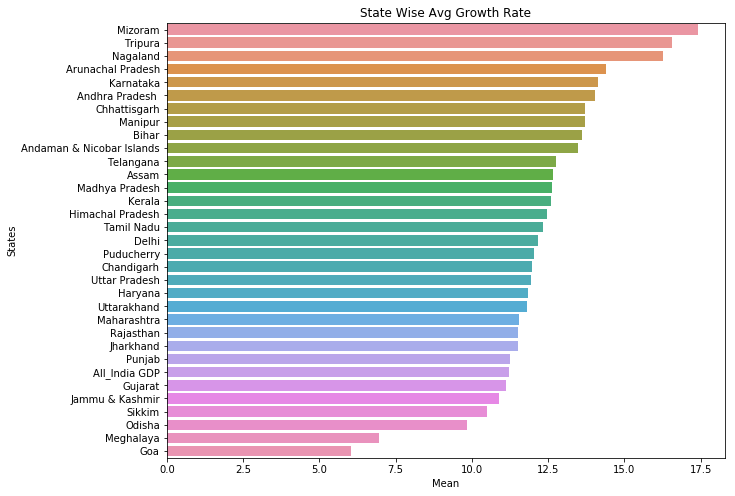

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the GSDP file
df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/GSDP.csv')

#Removing the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
df = df.loc[df.Duration != '2016-17']

#Removing West Bengal Column as nil values 
df = df.drop(['West Bengal1'],axis=1)

#Creating a new Data frame which has only Growth %
GSDP_df = df[5:10]

#Replacing all NaN with mean value and removing Items Description column
GSDP_df = GSDP_df.fillna(GSDP_df.mean(axis=0))
GSDP_df = GSDP_df.drop(['Items  Description'],axis=1)

#Transposing Rows & Columns 
GSDP_df = GSDP_df.T

#Aligning in the right format
GSDP_df = GSDP_df.rename(columns=GSDP_df.iloc[0]).drop(GSDP_df.index[0])
GSDP_df.reset_index(level=0,inplace=True)
GSDP_df.rename(columns = {'index':'States'},inplace=True)
GSDP_df = GSDP_df.drop(['2012-13'],axis=1)

#Adding Mean Column & Sorting by Mean Growth
GSDP_df['Mean'] = GSDP_df[['2013-14','2014-15','2015-16']].mean(axis=1)
GSDP_df = GSDP_df.sort_values(by=['Mean'],ascending=False)
                                  
#Plotting Data of Average Growth Rates of All States
plt.figure(figsize=(10,8))
plt.title('State Wise Avg Growth Rate')
sns.barplot(x='Mean',y='States',data=GSDP_df)
plt.show()

Above graph showing the Average growth rate of all states.
Key Observations:
    Mizoram, Tripura & Nagaland having the highest Avg Growth Rate for 3 consecutive years. While, Odisha, Meghalaya & Goa having least Avg Growth Rate

<Figure size 1440x576 with 0 Axes>

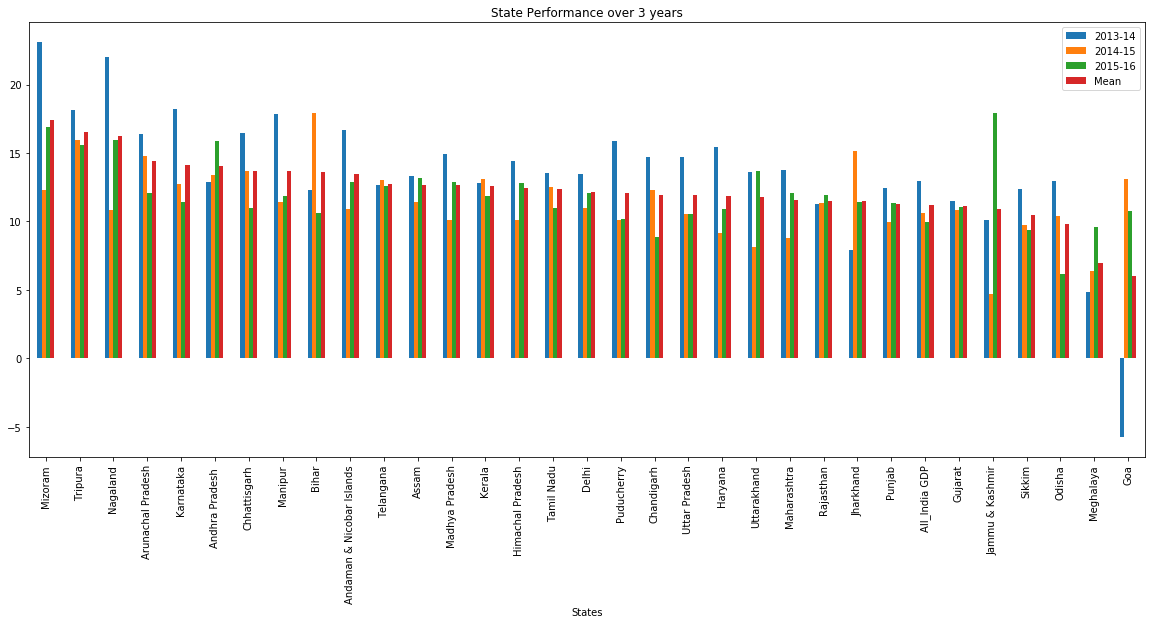

In [185]:
#States Performance over 2013-14, 2014-15, 2015-16
GSDP_df.index = GSDP_df['States']
plt.figure(figsize=(20,8))
GSDP_df.plot(kind='bar', figsize=(20,8))
plt.title('State Performance over 3 years')
plt.show()

Above Graph shows Growth rate for 3 years across all states.
Key Observations:
    --> Meghalaya & Andhra Pradesh shown consistent improvement over 3 years
    --> Arunachal Pradesh, Tripura, Karnataka, Chhattisgarh, Sikkim and India Overall are doing inconsistently over 3 years
    --> States like Telangana, Rajesthan, Gujarat are consistent on their Growth rate and neither showed improvement not declined.    

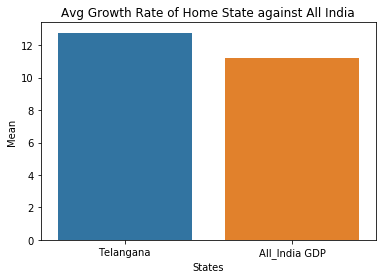

In [186]:
#Curiosity Exercise - Comparing Home State against India GDP
homest_df = GSDP_df.loc[(GSDP_df['States'] == 'All_India GDP') | (GSDP_df['States'] == 'Telangana'),:]
sns.barplot(x='States', y='Mean', data=homest_df)
plt.title('Avg Growth Rate of Home State against All India')
plt.show()

Above Graph clearly depicts telangana avg growth rate is better when compared with All over India

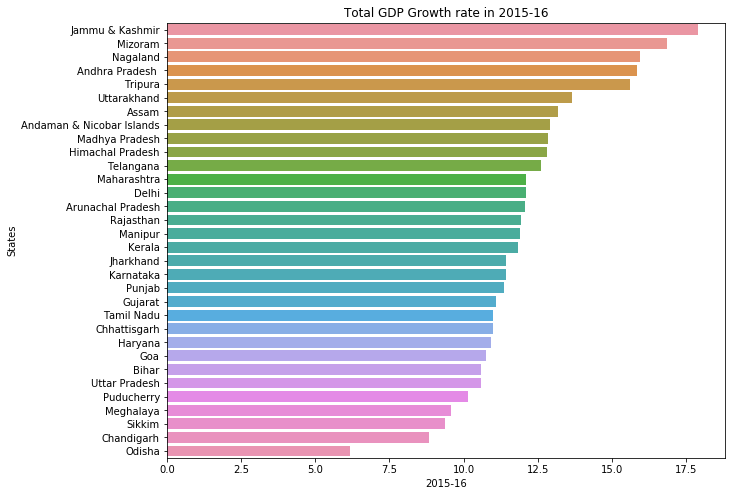

In [100]:
#Top5 & Bottom 5 states basis Total GDP rates in 2015-16 
sort_df = GSDP_df.loc[(GSDP_df['States'] != 'All_India GDP')]
sort_df = sort_df.sort_values(by=['2015-16'],ascending=False)
plt.figure(figsize=(10,8))
plt.title('Total GDP Growth rate in 2015-16')
sns.barplot(x='2015-16',y='States',data=sort_df)
plt.show()

Above Graph Depicts Top 5 & Bottom 5 states on basis on Growth rate in 2015-16

GDP Analysis of India States Part - I B

In [120]:
#Reading Data from all the files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


state1_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')
state1_df['State'] = 'Andhra Pradesh'
state2_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')
state2_df['State'] = 'Arunachal Pradesh'
state3_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Assam-GSVA_cur_2015-16.csv')
state3_df['State'] = 'Assam'
state4_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Bihar-GSVA_cur_2015-16.csv')
state4_df['State'] = 'Bihar'
state5_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Chhattisgarh-GSVA_cur_2016-17.csv')
state5_df['State'] = 'Chhatisgarh'
state6_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Goa-GSVA_cur_2015-16.csv')
state6_df['State'] = 'Goa'
state7_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Gujarat-GSVA_cur_2015-16.csv')
state7_df['State'] = 'Gujarat'
state8_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Haryana-GSVA_cur_2016-17.csv')
state8_df['State'] = 'Haryana'
state9_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')
state9_df['State'] = 'Himachal Pradesh'
state10_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Jharkhand-GSVA_cur_2015-16.csv')
state10_df['State'] = 'Jharkhand'
state11_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Karnataka-GSVA_cur_2015-16.csv')
state11_df['State'] = 'Karnataka'
state12_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Kerala-GSVA_cur_2015-16.csv')
state12_df['State'] = 'Kerala'
state13_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')
state13_df['State'] = 'Madhya Pradesh'
state14_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Maharashtra-GSVA_cur_2014-15.csv')
state14_df['State'] = 'Maharashtra'
state15_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Manipur-GSVA_cur_2014-15.csv',encoding = 'unicode_escape')
state15_df['State'] = 'Manipur'
state16_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Meghalaya-GSVA_cur_2016-17.csv')
state16_df['State'] = 'Meghalaya'
state17_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Mizoram-GSVA_cur_2014-15.csv')
state17_df['State'] = 'Mizoram'
state18_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Nagaland-GSVA_cur_2014-15.csv')
state18_df['State'] = 'Nagaland'
state19_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Odisha-GSVA_cur_2016-17.csv')
state19_df['State'] = 'Odisha'
state20_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Punjab-GSVA_cur_2014-15.csv')
state20_df['State'] = 'Punjab'
state21_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Rajasthan-GSVA_cur_2014-15.csv')
state21_df['State'] = 'Rajasthan'
state22_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')
state22_df['State'] = 'Tamil Nadu'
state23_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Telangana-GSVA_cur_2016-17.csv')
state23_df['State'] = 'Telangana'
state24_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Tripura-GSVA_cur_2014-15.csv')
state24_df['State'] = 'Tripura'
state25_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')
state25_df['State'] = 'Uttar Pradesh'
state26_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Uttarakhand-GSVA_cur_2015-16.csv')
state26_df['State'] = 'Uttrakhand'
state27_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/NAD-Sikkim-GSVA_cur_2015-16.csv')
state27_df['State'] = 'Sikkim'

In [121]:
#Merging all files into one main Data Frame
main_df = pd.concat([state1_df,state2_df,state3_df,state4_df,state5_df,state6_df,state7_df,state8_df,state9_df,state10_df, \
                    state11_df,state12_df,state13_df,state14_df,state15_df,state16_df,state17_df,state18_df,state19_df, \
                    state20_df,state21_df,state22_df,state23_df,state24_df,state25_df,state26_df,state27_df])

C:\Users\Rohini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [122]:
#Filtering only with required Data from the main Data Set
main_df = main_df[['Item','State','2014-15']]

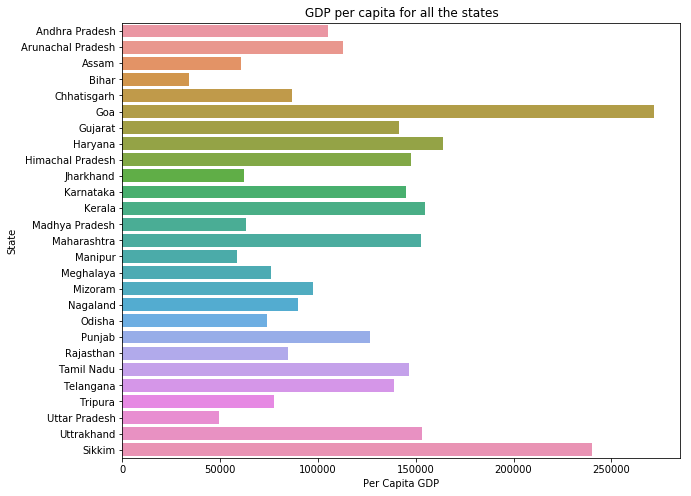

In [123]:
#Creating a new Data Frame to compare State wise GDP per Capita 
India_GDPC = main_df.loc[main_df['Item'] == 'Per Capita GSDP (Rs.)']
India_GDPC = India_GDPC.rename(columns = {'2014-15':'Per Capita GDP'})
plt.figure(figsize=(10,8))
plt.title('GDP per capita for all the states')
sns.barplot(x='Per Capita GDP',y='State',data=India_GDPC)
plt.show()

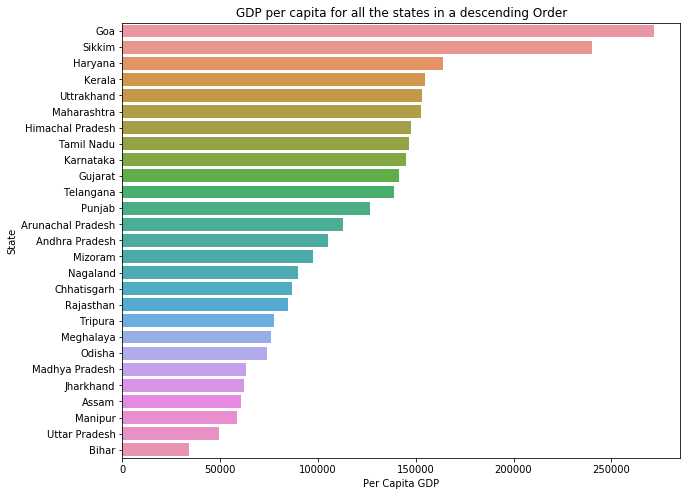

In [124]:
#Top-5 and the bottom-5 states based on GDP per capita. 
India_GDPC = India_GDPC.sort_values(by=['Per Capita GDP'],ascending=False)
plt.figure(figsize=(10,8))
plt.title('GDP per capita for all the states in a descending Order')
sns.barplot(x='Per Capita GDP',y='State',data=India_GDPC)
plt.show()

Above graph clearly shows below:
Top 5 states on GDP per Capita:
    Goa, Sikkim, Haryana, Kerala & Uttrakhand
Bottom 5 states on GDP per Capita:
    Jharkhan, Assam, Manipur, Utter Pradesh & Bihar

In [125]:
#Ratio of Highest GDP to the lowest GDP
India_GDPC = India_GDPC[['State','Per Capita GDP']]
Ratio = India_GDPC['Per Capita GDP'].max()/India_GDPC['Per Capita GDP'].min()
Ratio

8.004741709371503

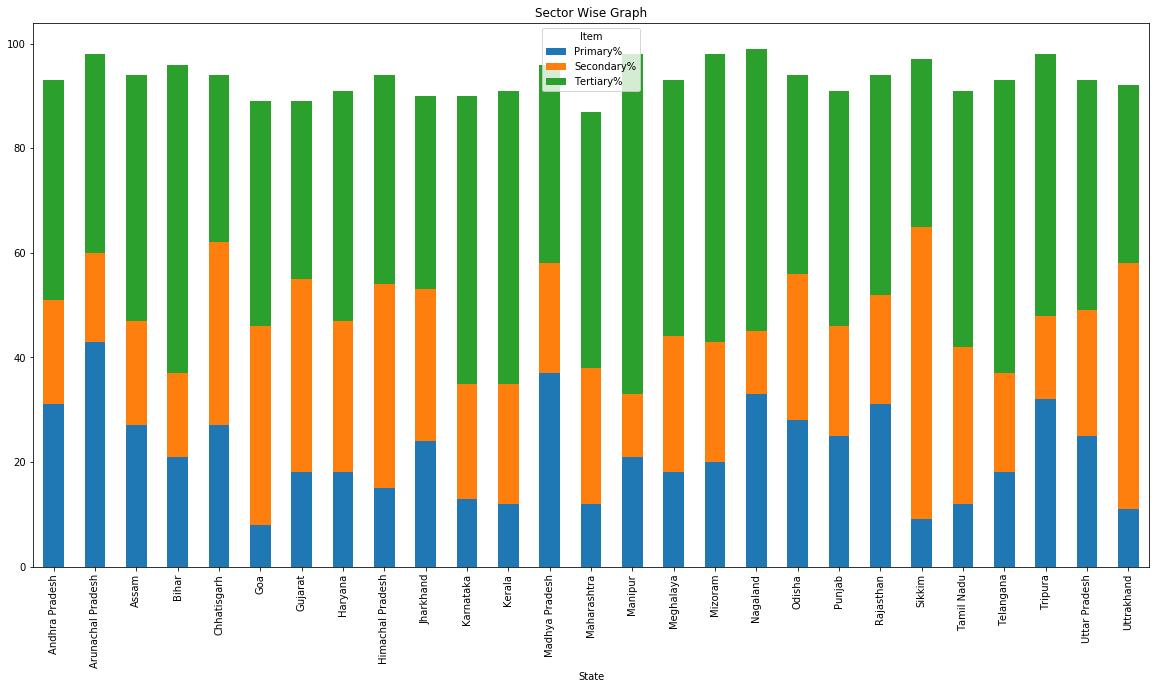

In [188]:
#Creating a seperate Data Frame to analyse Sector wise contribution to the total GDP
sctr_India = main_df.loc[(main_df.Item == 'Primary')|(main_df.Item == 'Secondary')|(main_df.Item == 'Tertiary')\
                            |(main_df.Item == 'Taxes on Products')|(main_df.Item == 'Subsidies on products')\
                            |(main_df.Item == 'Gross State Domestic Product') ]
sctr_India = sctr_India.rename(columns = {'2014-15':'GDP'})
sctr_India = sctr_India.pivot(index='State',columns='Item',values='GDP',)
sctr_India['State'] = sctr_India.index
sctr_India['Primary%'] = round(100*(sctr_India['Primary']/sctr_India['Gross State Domestic Product']))
sctr_India['Secondary%'] = round(100*(sctr_India['Secondary']/sctr_India['Gross State Domestic Product']))
sctr_India['Tertiary%'] = round(100*(sctr_India['Tertiary']/sctr_India['Gross State Domestic Product']))


#Sector wise contribution to total GDP per State
sctr_India.plot(x='State',y=['Primary%','Secondary%','Tertiary%'],stacked=True,kind='bar',figsize=(20,10))
plt.title('Sector Wise Graph')
plt.show()

In [189]:
#Adding a percentile for Per Capita GDP to all states and categorised basis the percentile 
India_GDPC['Percentile'] = round(100*(India_GDPC['Per Capita GDP'].rank(pct=True)))
India_GDPC = India_GDPC.sort_values(by='Percentile',ascending=False)
India_GDPC['Category'] = pd.qcut(India_GDPC['Percentile'],[0,0.19,0.49,0.84,1],labels=['Poor','Lower Middle','Upper Middle',\
                                                                                       'Rich'])
India_GDPC

,State,Per Capita GDP,Percentile,Category
32,Goa,271793.0,100.0,Rich
32,Sikkim,240274.0,96.0,Rich
32,Haryana,164077.0,93.0,Rich
32,Kerala,154778.0,89.0,Rich
32,Uttrakhand,153076.0,85.0,Rich
32,Maharashtra,152853.0,81.0,Upper Middle
32,Himachal Pradesh,147330.0,78.0,Upper Middle
32,Tamil Nadu,146503.0,74.0,Upper Middle
32,Karnataka,145141.0,70.0,Upper Middle
32,Gujarat,141263.0,67.0,Upper Middle


States are divinded into 4 categories (Rich, Upper middle, Lower middle & poor) basis their per capita GDP in the year 2014-15.
Result is shown above.
100 - 85 percentile states considered to be Rich
85 - 50 percentile states considered to be Upper middle
50 - 20 percentile states considered to be Lower middle and
below 20 percentile states considered to be Poor

In [223]:
#Creating a Data Frame for Sub sector from the Main DF
subsctr_India = main_df.loc[(main_df.Item != 'Primary')&(main_df.Item != 'Secondary')&(main_df.Item != 'Tertiary')\
                            &(main_df.Item != 'Taxes on Products')&(main_df.Item != 'Subsidies on products')\
                            &(main_df.Item != 'Gross State Domestic Product') & (main_df.Item != 'TOTAL GSVA at basic prices')\
                           &(main_df.Item != "Population ('00)")&(main_df.Item != 'Per Capita GSDP (Rs.)')]

#Merging Sub Sector Dataframe and Categorised Datafarme
subsctr_India = pd.merge(subsctr_India,India_GDPC,on='State',how='inner')
subsctr_India

,Item,State,2014-15,Per Capita GDP,Percentile,Category
0,"Agriculture, forestry and fishing",Andhra Pradesh,14819416.0,104977.0,52.0,Upper Middle
1,Crops,Andhra Pradesh,7893514.0,104977.0,52.0,Upper Middle
2,Livestock,Andhra Pradesh,4309078.0,104977.0,52.0,Upper Middle
3,Forestry and logging,Andhra Pradesh,346160.0,104977.0,52.0,Upper Middle
4,Fishing and aquaculture,Andhra Pradesh,2270664.0,104977.0,52.0,Upper Middle
5,Mining and quarrying,Andhra Pradesh,1484300.0,104977.0,52.0,Upper Middle
6,Manufacturing,Andhra Pradesh,4672266.0,104977.0,52.0,Upper Middle
7,"Electricity, gas, water supply & other utility...",Andhra Pradesh,1151729.0,104977.0,52.0,Upper Middle
8,Construction,Andhra Pradesh,4664889.0,104977.0,52.0,Upper Middle
9,"Trade, repair, hotels and restaurants",Andhra Pradesh,4233400.0,104977.0,52.0,Upper Middle


In [224]:
#Filtering only required columns from the dataset
subsctr_India = subsctr_India[['Item','State','2014-15','Category']]
subsctr_India = subsctr_India.rename(columns={'2014-15':'GDP'})

#Creating Seperate Datafarmes for each of the Categories
Rich_subsctr = subsctr_India.loc[subsctr_India['Category'] == 'Rich']
Upper_subsctr = subsctr_India.loc[subsctr_India['Category'] == 'Upper Middle']
Lower_subsctr = subsctr_India.loc[subsctr_India['Category'] == 'Lower Middle']
Poor_subsctr = subsctr_India.loc[subsctr_India['Category'] == 'Poor']

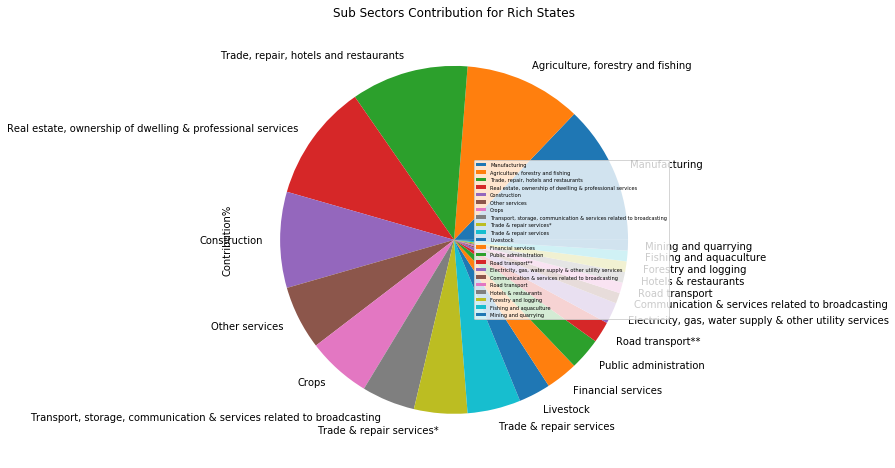

In [220]:
#Finiding top Contributors from "Rich" Category
Rich_subsctr = Rich_subsctr.groupby('Item')
Rich_subsctr = pd.DataFrame(Rich_subsctr['GDP'].sum().sort_values(ascending=False))
Rich_subsctr['Sub Sector'] = Rich_subsctr.index
Rich_subsctr['Contribution%'] = round(100*(Rich_subsctr.GDP/Rich_subsctr.GDP.sum()))
Rich_subsctr = Rich_subsctr.reset_index()
Rich_subsctr = Rich_subsctr[['Sub Sector','GDP','Contribution%']]
Rich_subsctr.index = Rich_subsctr['Sub Sector']
Rich_subsctr.plot(x='Sub Sector',y='Contribution%',kind='pie',figsize=(10,8))
plt.legend(loc="center right", fontsize=5)
plt.title('Sub Sectors Contribution for Rich States')
plt.show()

Below are the Sub Sectors which are contributing to 80% of GDP in Rich States
1) Manufacturing
2) Agriculture, forestry and fishing
3) Trade, repair, hotels and restaurants
4) Real estate, ownership of dwelling & professio...
5) Construction
6) Other services
7) Crops
8) Transport, storage, communication & services r...
9) Trade & repair services

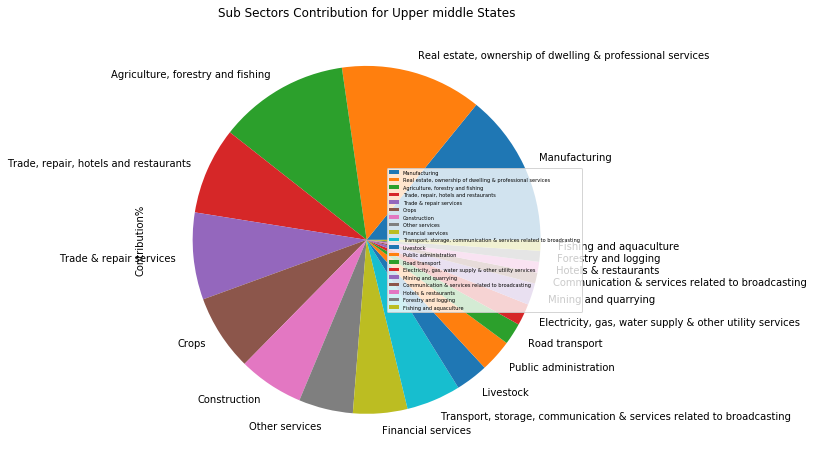

In [225]:
#Finiding top Contributors from "Upper" category
Upper_subsctr = Upper_subsctr.groupby('Item')
Upper_subsctr = pd.DataFrame(Upper_subsctr['GDP'].sum().sort_values(ascending=False))
Upper_subsctr['Sub Sector'] = Upper_subsctr.index
Upper_subsctr['Contribution%'] = round(100*(Upper_subsctr.GDP/Upper_subsctr.GDP.sum()))
Upper_subsctr = Upper_subsctr.reset_index()
Upper_subsctr = Upper_subsctr[['Sub Sector','GDP','Contribution%']]
Upper_subsctr.index = Upper_subsctr['Sub Sector']
Upper_subsctr.plot(x='Sub Sector',y='Contribution%',kind='pie',figsize=(10,8))
plt.legend(loc="center right", fontsize=5)
plt.title('Sub Sectors Contribution for Upper middle States')
plt.show()

Below are the Sub Sectors which are contributing to 80% of GDP in "Upper Middle" States
1) Manufacturing
2) Real estate, ownership of dwelling & professio...
3) Agriculture, forestry and fishing
4) Trade, repair, hotels and restaurants
5) Trade & repair services
6) Crops
7) Construction
8) Other services
9) Financial services

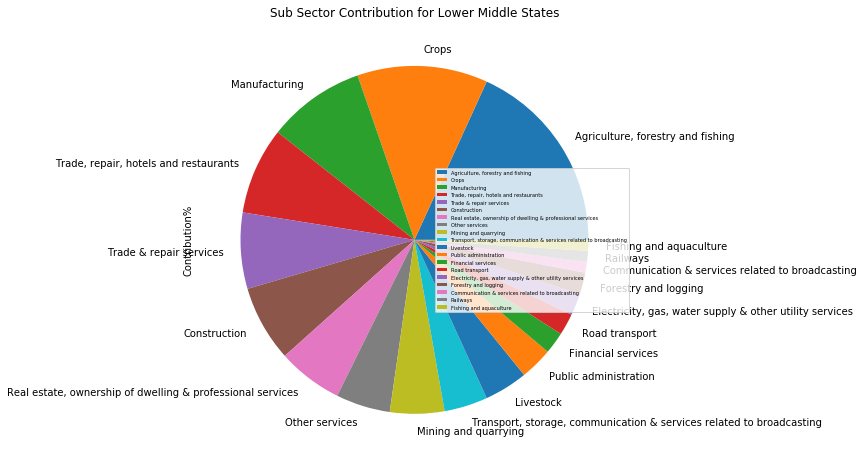

In [226]:
#Finiding top Contributors from "Lower" Category
Lower_subsctr = Lower_subsctr.groupby('Item')
Lower_subsctr = pd.DataFrame(Lower_subsctr['GDP'].sum().sort_values(ascending=False))
Lower_subsctr['Sub Sector'] = Lower_subsctr.index
Lower_subsctr['Contribution%'] = round(100*(Lower_subsctr.GDP/Lower_subsctr.GDP.sum()))
Lower_subsctr = Lower_subsctr.reset_index()
Lower_subsctr = Lower_subsctr[['Sub Sector','GDP','Contribution%']]
Lower_subsctr.index = Lower_subsctr['Sub Sector']
Lower_subsctr.plot(x='Sub Sector',y='Contribution%',kind='pie',figsize=(10,8))
plt.legend(loc="center right", fontsize=5)
plt.title('Sub Sector Contribution for Lower Middle States')
plt.show()

Below are the Sub Sectors which are contributing to 80% of GDP in Lower Middle States 
1) Agriculture, forestry and fishing
2) Crops
3) Manufacturing
4) Trade, repair, hotels and restaurants
5) Trade & repair services
6) Construction
7) Real estate, ownership of dwelling & professio...
8) Other services
9) Mining and quarrying
10) Transport, storage, communication & services r...

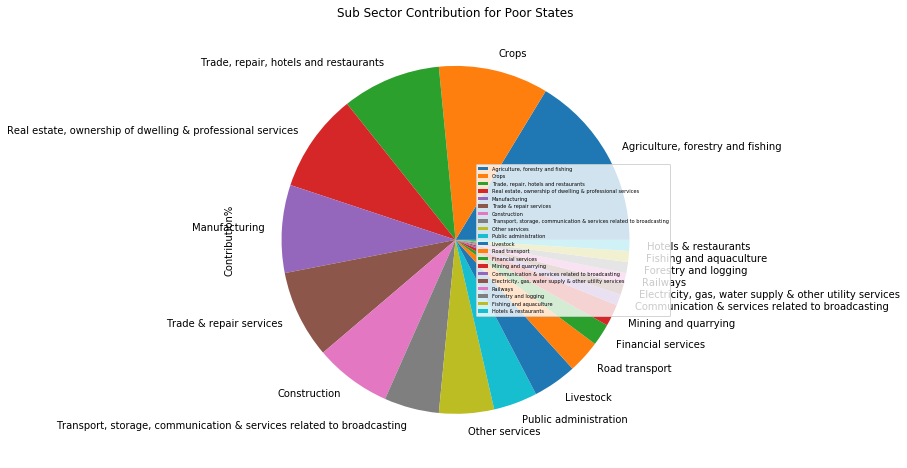

In [227]:
#Finiding top Contributors from Poor Class Sub Sector
Poor_subsctr = Poor_subsctr.groupby('Item')
Poor_subsctr = pd.DataFrame(Poor_subsctr['GDP'].sum().sort_values(ascending=False))
Poor_subsctr['Sub Sector'] = Poor_subsctr.index
Poor_subsctr['Contribution%'] = round(100*(Poor_subsctr.GDP/Poor_subsctr.GDP.sum()))
Poor_subsctr = Poor_subsctr.reset_index()
Poor_subsctr = Poor_subsctr[['Sub Sector','GDP','Contribution%']]
Poor_subsctr.index = Poor_subsctr['Sub Sector']
Poor_subsctr.plot(x='Sub Sector',y='Contribution%',kind='pie',figsize=(10,8))
plt.legend(loc="center right", fontsize=5)
plt.title('Sub Sector Contribution for Poor States')
plt.show()

Below are the Sub sectors which are contributing to 80% of GDP in Poor States
1) Agriculture, forestry and fishing
2) Crops
3) Trade, repair, hotels and restaurants
4) Real estate, ownership of dwelling & professio...
5) Manufacturing
6) Trade & repair services
7) Construction
8) Transport, storage, communication & services r...
9) Other services
10) Public administration

GDP Analysis of Indian States Part II

In [172]:
#Reading Data from all the files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


edu_df = pd.read_csv('C:/Users/Rohini/Downloads/Python/GDP Assignment/rs_session243_au570_1.1.csv')

#Filtering only required Columns
edu_df = edu_df[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015',\
                    'Senior Secondary - 2014-2015']]

#Removing all UT
edu_df = edu_df.loc[(edu_df['Level of Education - State'] != 'A & N Islands')&\
                    (edu_df['Level of Education - State'] != 'Chandigarh')&(edu_df['Level of Education - State'] != 'Daman & Diu')\
                   &(edu_df['Level of Education - State'] != 'Dadra & Nagar Haveli')&(edu_df['Level of Education - State'] != 'Puducherry')\
                   &(edu_df['Level of Education - State'] != 'Lakshadweep')&(edu_df['Level of Education - State'] != 'Delhi')]

#Removing West Bengal & Jammu Kahmir
edu_df = edu_df.loc[(edu_df['Level of Education - State'] != 'West Bengal')&\
                    (edu_df['Level of Education - State'] != 'Jammu and Kashmir')]

#Replacing all Nan Values with Mean value
edu_df = edu_df.fillna(edu_df.mean(),axis=0)

In [173]:
#Renaming the columns and merging data frames
edu_df = edu_df.rename(columns = {'Level of Education - State' : 'State'})
edu_df['Total Drop Rate'] = edu_df.sum(axis=1)
edu_df = pd.merge(edu_df,India_GDPC,on='State',how='inner')

#Filtering only required columns
edu_df = edu_df[['State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015'\
                ,'Per Capita GDP','Total Drop Rate']]
edu_df

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,Per Capita GDP,Total Drop Rate
0,Andhra Pradesh,4.350000,5.200000,15.71,5.928947,104977.0,31.188947
1,Arunachal Pradesh,10.890000,6.710000,17.11,18.420000,112718.0,53.130000
2,Assam,7.440000,10.510000,27.06,5.928947,60621.0,50.938947
3,Bihar,2.090000,4.080000,25.90,5.928947,33954.0,37.998947
4,Chhatisgarh,1.420000,5.850000,21.26,2.760000,86860.0,31.290000
5,Goa,0.200000,0.070000,11.15,13.910000,271793.0,25.330000
6,Gujarat,0.760000,6.410000,25.04,7.040000,141263.0,39.250000
7,Haryana,0.410000,5.810000,15.89,5.750000,164077.0,27.860000
8,Himachal Pradesh,0.460000,0.870000,6.07,7.410000,147330.0,14.810000
9,Jharkhand,6.410000,8.990000,24.00,3.410000,62091.0,42.810000


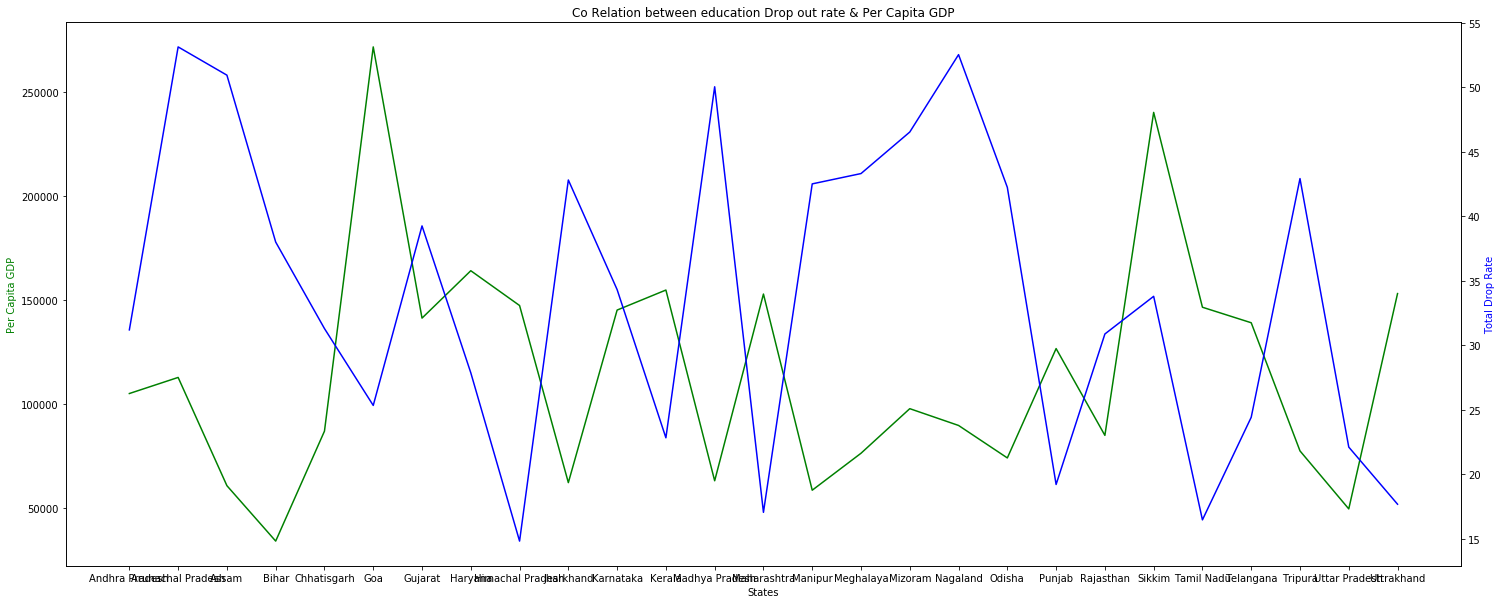

In [180]:
#Co-Relation between Total Dropout% and Per Capita GDP
cor_df = edu_df[['State','Per Capita GDP','Total Drop Rate']]
x = cor_df['State']
y1 = cor_df['Per Capita GDP']
y2 = cor_df['Total Drop Rate']

fig, ax1 = plt.subplots(figsize=(25,10))
#plt.figure(figsize=(20,10))
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
plt.title('Co Relation between education Drop out rate & Per Capita GDP')
ax1.set_xlabel('States')
ax1.set_ylabel('Per Capita GDP', color='g')
ax2.set_ylabel('Total Drop Rate', color='b')

plt.show()

In the above graph, blue line indicates Total Drop out rate in all the states & Green line indicates Per Capita GDP.
Observation: Per Capita GDP is inversly propotional to Drop out rate. Wherever there is high drop out rate, Per capita GDP is low and vice versa

<Figure size 1440x576 with 0 Axes>

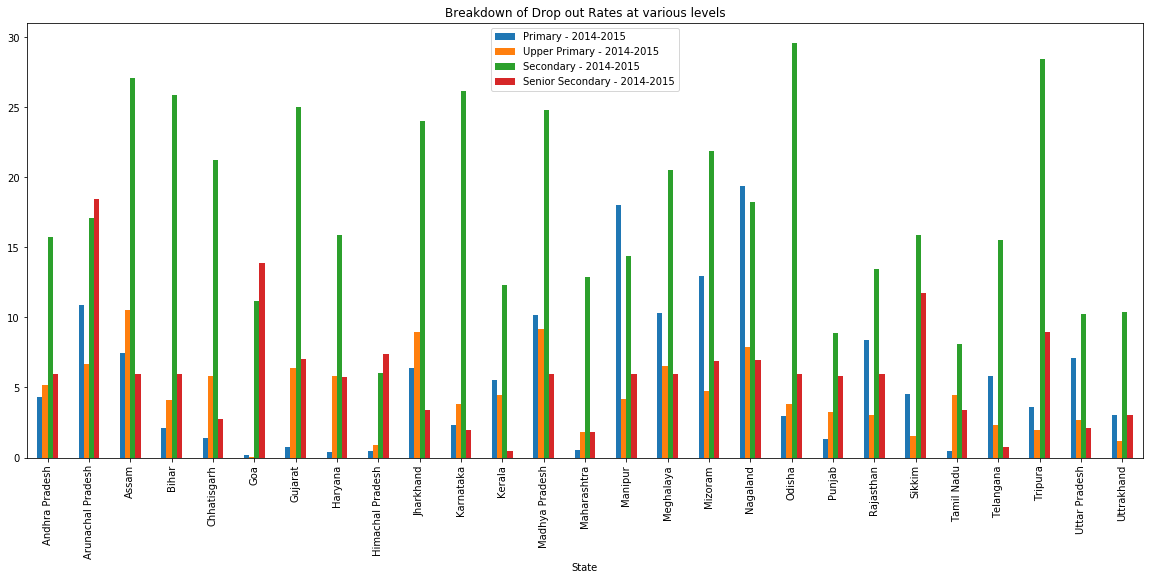

In [182]:
#Break down of total Drop out rate per state
Break_df = edu_df[['State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]
Break_df.index = Break_df['State']
plt.figure(figsize=(20,8))
Break_df.plot(kind='bar', figsize=(20,8))
plt.title('Breakdown of Drop out Rates at various levels')
plt.show()

Clearly a huge drop out rate at Secoundary level of schooling when compared to other levels